In [208]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

(500, 403, 3)


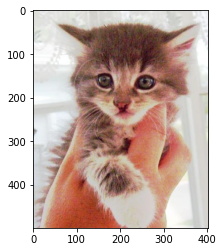

In [210]:
cat = cv2.imread('DATA/CATS_DOGS/train/CAT/100.jpg')
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)
print(cat.shape)
plt.imshow(cat)

(320, 350, 3)


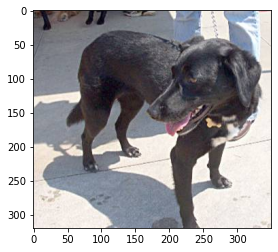

In [214]:
dog = cv2.imread('DATA/CATS_DOGS/train/DOG/400.jpg')
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)
print(dog.shape)
plt.imshow(dog)

In [215]:
print(cat.max())
print(dog.max())
print(cat.min())
print(dog.min())

255
255
0
0


In [216]:
from keras.preprocessing.image import ImageDataGenerator

In [217]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

image_gen

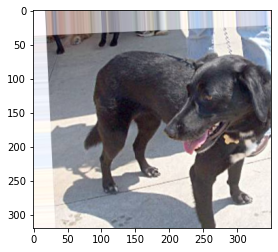

In [218]:
plt.imshow(image_gen.random_transform(dog))

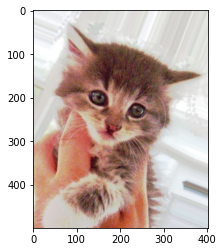

In [219]:
plt.imshow(image_gen.random_transform(cat))

In [220]:
image_gen.flow_from_directory('DATA/CATS_DOGS/train/')

Found 18743 images belonging to 2 classes.


## Building Model

In [221]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten,  Conv2D, MaxPooling2D, Dense

In [222]:
input_shape = (150, 150, 3)

In [223]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = input_shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

##
model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = input_shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

##
model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = input_shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))  #Turn's Neuron's Off - 50% and reduce overfitting

model.add(Dense(1))  #Output Neuron
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [224]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 18496)           

## Training the Model

In [225]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('DATA/CATS_DOGS/train/',
                                                target_size=input_shape[:2],
                                                batch_size = batch_size,
                                                class_mode = 'binary')


test_image_gen = image_gen.flow_from_directory('DATA/CATS_DOGS/test/',
                                                target_size=input_shape[:2],
                                                batch_size = batch_size,
                                                class_mode = 'binary')

print(train_image_gen)
print(test_image_gen)

Found 18743 images belonging to 2 classes.
Found 6251 images belonging to 2 classes.


In [226]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [227]:
results = model.fit_generator(train_image_gen,
                              epochs=1,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                             validation_steps=12)

Epoch 1/1
150/150 [==============================] - 74s 493ms/step - loss: 0.6966 - accuracy: 0.4917 - val_loss: 0.6911 - val_accuracy: 0.5469


In [228]:
results.history['accuracy']

[0.49166667]

In [269]:
from keras.models import load_model

In [270]:
new_model = load_model('DATA/cat_dog_100epochs.h5')

## Predicting on a New Image which model has unseen

In [244]:
from keras.preprocessing import image

In [275]:
#Loading Images from Test Data for Testing
dog_file = 'DATA/CATS_DOGS/test/DOG/9583.jpg'
cat_file = 'DATA/CATS_DOGS/test/CAT/9379.jpg'


#resize the image
dog_img = image.load_img(dog_file, target_size=(150, 150))
cat_img = image.load_img(cat_file, target_size=(150, 150))

#convert to array
dog_img = image.img_to_array(dog_img)
cat_img = image.img_to_array(cat_img)

#check shape
print(dog_img.shape)
print(cat_img.shape)

(150, 150, 3)
(150, 150, 3)


## STEP1. Dimensions are (150,150,3) - Change to (1,150,150,3)
#### Changing because neural network thinks it a batch of 1 image

In [276]:
import numpy as np

#Upon rerunning below two expand codes again and again dimensions change, please note this step
dog_img = np.expand_dims(dog_img, axis = 0)  
cat_img = np.expand_dims(cat_img, axis = 0)

print(dog_img.shape)
print(cat_img.shape)

(1, 150, 150, 3)
(1, 150, 150, 3)


In [277]:
dog_img = dog_img/255
cat_img = cat_img/255

## Predict

In [278]:
pred1 = new_model.predict(dog_img)
pred2 = new_model.predict(cat_img)

print(pred1)
print(pred2)

[[0.9730962]]
[[0.42493135]]


In [279]:
print(new_model.predict_classes(dog_img))
print(new_model.predict_classes(cat_img))

[[1]]
[[0]]


Dog Image Shape (306, 223, 3)


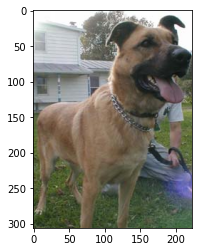

In [280]:
## Checing the inputs we provided

dog_file = cv2.imread(dog_file)
dog_file = cv2.cvtColor(dog_file, cv2.COLOR_BGR2RGB)
print('Dog Image Shape', dog_file.shape)
plt.imshow(dog_file)

Cat Image Shape (374, 500, 3)


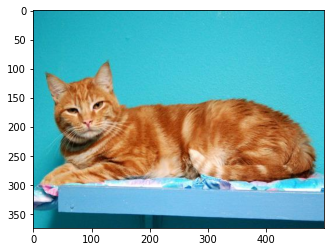

In [281]:
cat_file = cv2.imread(cat_file)
cat_file = cv2.cvtColor(cat_file, cv2.COLOR_BGR2RGB)
print('Cat Image Shape', cat_file.shape)
plt.imshow(cat_file)